In [4]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.path as paths

In [39]:
def plotPolygon(ax, polygon, color, linewidth=2, pt=False):
    if pt:
        ax.scatter(polygon[0], polygon[1], transform = ccrs.Geodetic(), color=color)
        return
    for i in range(1, len(polygon)):
        ax.plot([polygon[i - 1][0], polygon[i][0]],
                [polygon[i - 1][1], polygon[i][1]],
                color=color, linewidth=linewidth,
               transform = ccrs.Geodetic())

def plotData(plot_dict, metadata, ax):
    
    boundary = plot_dict["roi"][1]
    
    numLonPoints = 100j
    numLatPoints = 80j
    lon_grid, lat_grid = np.mgrid[boundary["minLon"]:boundary["maxLon"]:numLonPoints, 
                                  boundary["minLat"]:boundary["maxLat"]:numLatPoints]
    
    ptColor = "green"
    
    plotPolygon(ax, plot_dict["roi"][2], ptColor, linewidth=1)
    plotPolygon(ax, plot_dict["roi"][0], ptColor, linewidth=1)
    plotPolygon(ax, [plot_dict["roi"][0][1], metadata[plot_dict["closest_viirs"]]["center"]], "yellow", linewidth=1)
    plotPolygon(ax, metadata[plot_dict["closest_viirs"]]["bounds"], "red", linewidth=1)
    plotPolygon(ax, metadata[plot_dict["closest_viirs"]]["center"], "blue", linewidth=10, pt=True)
    
def inSwath(roi, swath_polygon):
    path = paths.Path(np.array(swath_polygon))
    for point in roi:
        if not path.contains_point(point):
            return False
    return True


In [32]:

folder = "../data/20200401/"
metadata = None
with open(folder + "metadata", "rb") as md_file:
    metadata = pickle.load(md_file)
    


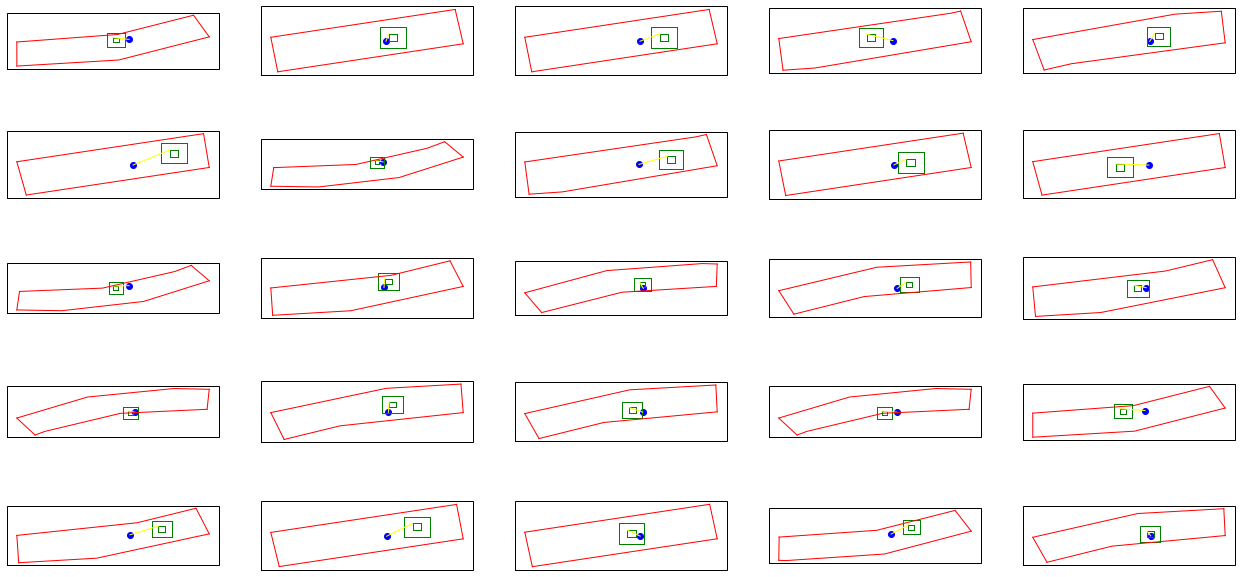

In [40]:

ncols = 5
nrows = 5
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, subplot_kw={'projection': ccrs.PlateCarree()})

datafiles = os.listdir(folder + "processed/")
for x in range(0, nrows):
    for y in range(0, ncols):
        plot_dict = None
        with open(folder + "processed/" + datafiles[y * ncols + x], "rb") as datafile:
            plot_dict = pickle.load(datafile)
        plotData(plot_dict, metadata, axes[x][y])
fig.set_size_inches(22, 11)
plt.show()
